# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = base_url + weather_api_key

# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found. Skipping...") 
        pass
        
print("-----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval 
-----------------------------
Processing record 1 of Set 1 | tuktoyaktuk
Processing record 2 of Set 1 | busselton
Processing record 3 of Set 1 | albany
Processing record 4 of Set 1 | hermanus
Processing record 5 of Set 1 | tanout
Processing record 6 of Set 1 | port alfred
Processing record 7 of Set 1 | klaksvik
Processing record 8 of Set 1 | husavik
Processing record 9 of Set 1 | hobart
Processing record 10 of Set 1 | kapaa
Processing record 11 of Set 1 | mnogovershinnyy
City not found. Skipping...
Processing record 12 of Set 1 | yarim
Processing record 13 of Set 1 | cape town
Processing record 14 of Set 1 | port blair
Processing record 15 of Set 1 | avera
Processing record 16 of Set 1 | riyadh
Processing record 17 of Set 1 | saldanha
City not found. Skipping...
Processing record 18 of Set 1 | ribeira grande
Processing record 19 of Set 1 | rikitea
Processing record 20 of Set 1 | saskylakh
Processing record 21 of Set 1 | mataura
Processing record 22 of Set 1 | 

Processing record 180 of Set 1 | kavaratti
Processing record 181 of Set 1 | luang prabang
Processing record 182 of Set 1 | vilhena
Processing record 183 of Set 1 | sint-pieters-leeuw
Processing record 184 of Set 1 | brae
Processing record 185 of Set 1 | rybinsk
Processing record 186 of Set 1 | livingston
Processing record 187 of Set 1 | lavrentiya
Processing record 188 of Set 1 | nantucket
Processing record 189 of Set 1 | olafsvik
Processing record 190 of Set 1 | kruisfontein
City not found. Skipping...
Processing record 191 of Set 1 | falam
Processing record 192 of Set 1 | amuntai
Processing record 193 of Set 1 | waddan
City not found. Skipping...
Processing record 194 of Set 1 | port elizabeth
Processing record 195 of Set 1 | sola
Processing record 196 of Set 1 | latung
Processing record 197 of Set 1 | nelson bay
Processing record 198 of Set 1 | naval
Processing record 199 of Set 1 | neiafu
Processing record 200 of Set 1 | cap malheureux
Processing record 201 of Set 1 | boende
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Convert array of JSONs into Pandas DataFrame
weather_dict = {"City": cityname,"Lat": lat, "Lng":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data_df = pd.DataFrame(weather_dict)


weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-28.48,75,17,3.87,CA,1611975600
1,Busselton,-33.6500,115.3333,80.56,47,0,6.53,AU,1611975600
2,Albany,42.6001,-73.9662,7.84,68,23,9.28,US,1611975600
3,Hermanus,-34.4187,19.2345,66.94,80,75,3.29,ZA,1611975600
4,Tanout,14.9709,8.8879,60.46,29,3,13.15,NE,1611975600
...,...,...,...,...,...,...,...,...,...
517,Shingū,33.7333,135.9833,46.54,51,20,10.13,JP,1611975600
518,Piteå,65.3172,21.4794,2.14,89,94,11.27,SE,1611975600
519,Katangli,51.7102,143.2326,0.63,92,100,15.90,RU,1611975600
520,Canutama,-6.5339,-64.3831,74.89,96,100,3.15,BR,1611975600


In [13]:
# Export the City_Data into a csv
weather_data_df.to_csv(r'output_data\weather_data.csv')

In [16]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,20.469574,13.793377,47.069636,74.438697,54.277778,8.228218,1.611976e+09
std,33.708145,92.048299,34.492137,16.702577,37.805156,5.695219,0.000000e+00
min,-54.800000,-175.200000,-44.090000,18.000000,0.000000,0.310000,1.611976e+09
25%,-8.470125,-68.847825,26.492500,68.000000,15.250000,3.580000,1.611976e+09
50%,23.430700,20.133300,58.005000,78.000000,58.000000,7.350000,1.611976e+09
75%,50.004425,95.070800,75.385000,85.000000,94.000000,11.315000,1.611976e+09
max,78.218600,179.316700,98.310000,100.000000,100.000000,31.410000,1.611976e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#Max humidity is 100, so nothing to remove.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

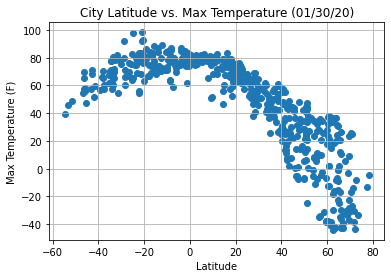

In [31]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/30/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Show plot
#plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data\City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

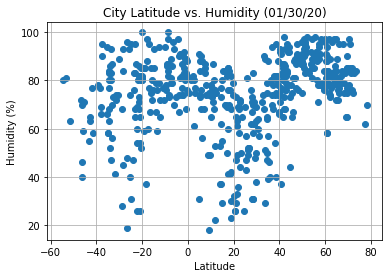

In [33]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/30/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Show plot
#plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data\City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

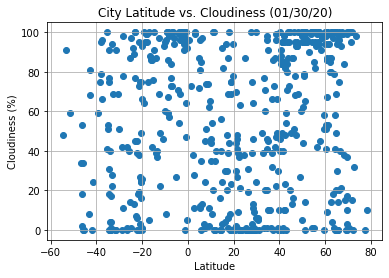

In [35]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/30/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Show plot
#plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data\City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

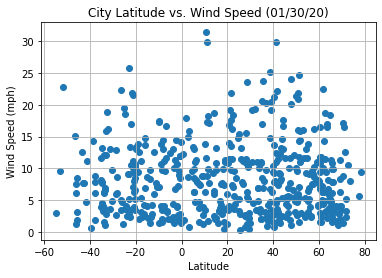

In [76]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/30/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Show plot
#plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data\City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7541120102245498


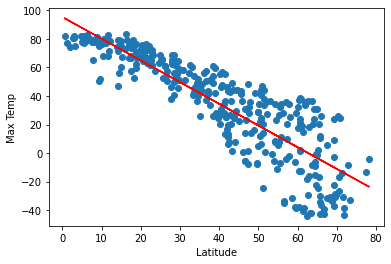

In [77]:
northern_hem=weather_data_df.loc[weather_data_df["Lat"]>=0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.3262193075334566


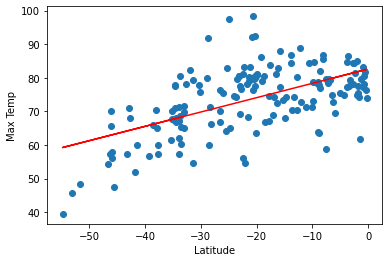

In [79]:
southern_hem=weather_data_df.loc[weather_data_df["Lat"]<0]

x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Southern - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.20778504732342773


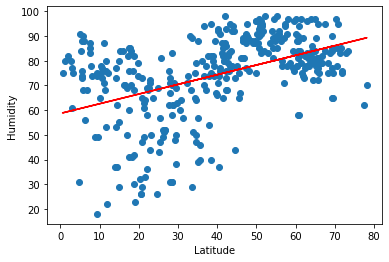

In [83]:
northern_hem=weather_data_df.loc[weather_data_df["Lat"]>=0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Humidity")

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Humidity vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.0989467497018529


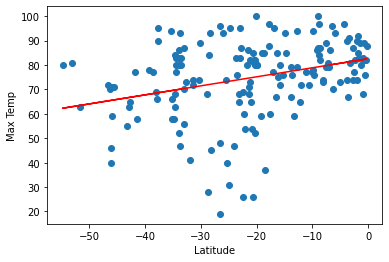

In [84]:
southern_hem=weather_data_df.loc[weather_data_df["Lat"]<0]

x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Southern - Humidity vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.08372907737583234


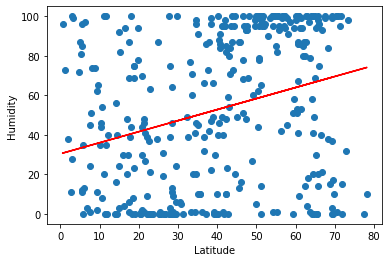

In [85]:
northern_hem=weather_data_df.loc[weather_data_df["Lat"]>=0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Humidity")

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Cloudiness vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.16489608511052534


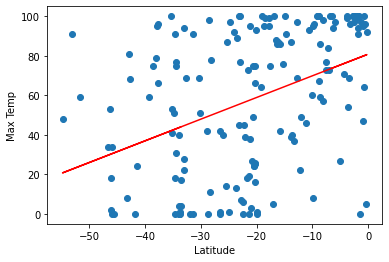

In [86]:
southern_hem=weather_data_df.loc[weather_data_df["Lat"]<0]

x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Southern - Cloudiness vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.005442920697223378


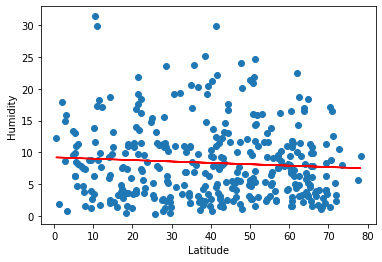

In [87]:
northern_hem=weather_data_df.loc[weather_data_df["Lat"]>=0]

x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Humidity")

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Wind Speed vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.0011587711040205457


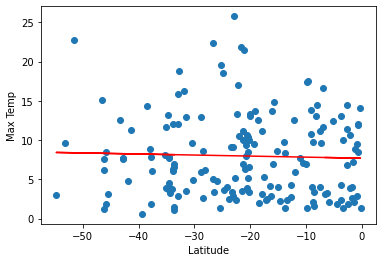

In [88]:
southern_hem=weather_data_df.loc[weather_data_df["Lat"]<0]

x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue**2}")

#plt.show()

plt.savefig("output_data\Southern - Wind Speed vs Latitude Linear Regression.png")